# **Hola Mundo Visual - Python**


A continuación el siguiente notebook:

- Genera una animación 2D que aplica traslación, rotación y escala (matrices homogéneas)
- Guarda el resultado como GIF usando imageio.

## **Descripción breve**

- Definimos una forma (estrella) en coordenadas 2D.
- Para cada frame calculamos matrices homogéneas de escala, rotación y traslación.
- Componemos las matrices: M = T @ R @ S (primero escala, luego rota, luego traslada).
- Aplicamos M sobre los puntos (coords homogéneas) y dibujamos.
- Mostramos las matrices resultantes en la figura 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from IPython.display import Image, display

In [2]:
# Figura: estrella 

def create_star(points=5, inner_ratio=0.45):
    """'Points es el número de puntas. Genera 2*points vértices alternando radio exterior e interior."""
    angles_outer = np.linspace(0, 2*np.pi, points, endpoint=False)
    angles_inner = angles_outer + np.pi/points
    r_outer = np.ones(points)
    r_inner = inner_ratio * np.ones(points)

    angles = np.empty(2*points)
    r = np.empty(2*points)
    angles[0::2] = angles_outer
    angles[1::2] = angles_inner
    r[0::2] = r_outer
    r[1::2] = r_inner

    x = r * np.cos(angles)
    y = r * np.sin(angles)
    pts = np.vstack((x, y))  # 2 x N
    return pts

# Matrices homogéneas 3x3
def translation_matrix(tx, ty):
    return np.array([[1, 0, tx],
                     [0, 1, ty],
                     [0, 0, 1]])


def rotation_matrix(theta):
    c, s = np.cos(theta), np.sin(theta)
    return np.array([[c, -s, 0],
                     [s,  c, 0],
                     [0,  0, 1]])


def scale_matrix(sx, sy):
    return np.array([[sx, 0, 0],
                     [0, sy, 0],
                     [0,  0, 1]])


def apply_transform(points_2xN, M):
    ones = np.ones((1, points_2xN.shape[1]))
    pts_h = np.vstack((points_2xN, ones))  # 3 x N
    transformed = M @ pts_h
    return transformed[:2, :]



C:\Users\Maria Camila Sanchez\AppData\Local\Temp\ipykernel_22008\2474129593.py:52: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  ax.plot(origin_t[0, 0], origin_t[1, 0], 'ko', markersize=1, color='yellow')
C:\Users\Maria Camila Sanchez\AppData\Local\Temp\ipykernel_22008\2474129593.py:61: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  img = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8').reshape(h, w, 3)


GIF creado: hola_mundo_visual_estrella.gif (120 frames, 24 fps)


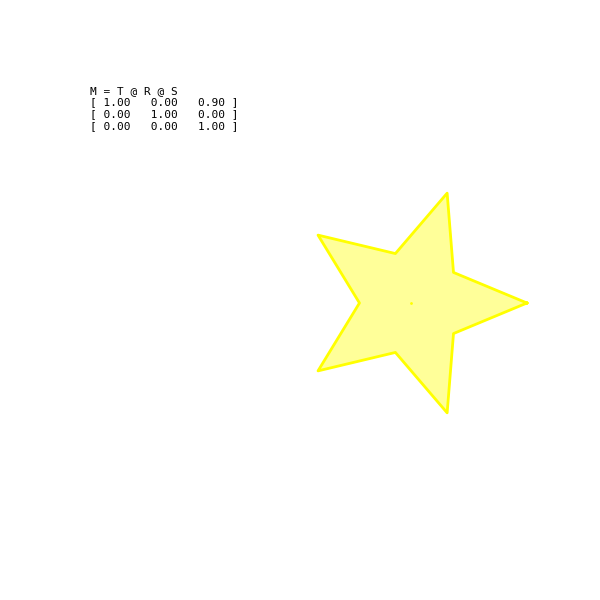

In [3]:
# Parámetros de la animación
frames = 120
fps = 24
outfile = 'hola_mundo_visual_estrella.gif'

# Figura base: estrella de 5 puntas 
points = create_star(points=5, inner_ratio=0.45)

# Crear figura y ejes una sola vez con tamaño fijo 
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)  # canvas 600x600 px
ax.set_aspect('equal')
ax.axis('off')
ax_lim = 2.0
ax.set_xlim(-ax_lim, ax_lim)
ax.set_ylim(-ax_lim, ax_lim)

# Generar animación y escribir GIF frame a frame
with imageio.get_writer(outfile, mode='I', fps=fps) as writer:
    t_vals = np.linspace(0, 2 * np.pi, frames)
    for i, t in enumerate(t_vals):
        # Parámetros dependientes del tiempo
        tx = 0.9 * np.cos(1.1 * t)       # traslación x
        ty = 0.6 * np.sin(1.3 * t)       # traslación y
        theta = 1.5 * t                  # rotación
        s = 0.7 + 0.6 * (0.5 + 0.5 * np.sin(0.9 * t))  # escala positiva

        # Matrices y composición: S -> R -> T
        S = scale_matrix(s, s)
        R = rotation_matrix(theta)
        T = translation_matrix(tx, ty)
        M = T @ R @ S

        # Aplicar transformación
        transformed = apply_transform(points, M)

        # Dibujar
        ax.clear()
        ax.set_xlim(-ax_lim, ax_lim)
        ax.set_ylim(-ax_lim, ax_lim)
        ax.set_aspect('equal')
        ax.axis('off')

        # Dibujo de la estrella 
        x_plot = np.append(transformed[0, :], transformed[0, 0])
        y_plot = np.append(transformed[1, :], transformed[1, 0])
        ax.plot(x_plot, y_plot, linewidth=2, color='yellow')
        ax.fill(transformed[0, :], transformed[1, :], color='yellow', alpha=0.4)

        # Dibujar marcador central para ver la traslación
        origin = np.array([[0.0], [0.0]])
        origin_t = apply_transform(origin, M)
        ax.plot(origin_t[0, 0], origin_t[1, 0], 'ko', markersize=1, color='yellow')

        # Mostrar la matriz compuesta en la esquina con sus constantes cambios
        mat_text = '\n'.join(['[' + '  '.join(f"{val: .2f}" for val in row) + ' ]' for row in M])
        ax.text(-ax_lim + 0.12, ax_lim - 0.12, 'M = T @ R @ S\n' + mat_text, fontsize=8, va='top', family='monospace')

        # Extraer imagen 
        fig.canvas.draw()
        w, h = fig.canvas.get_width_height()
        img = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8').reshape(h, w, 3)

        writer.append_data(img)


plt.close(fig)
print(f"GIF creado: {outfile} ({frames} frames, {fps} fps)")

try:
    display(Image(outfile))
except Exception:
    pass
